In [1]:
!pip install datasets

     |████████████████████████████████| 311 kB 12.8 MB/s 
     |████████████████████████████████| 212 kB 30.6 MB/s 
     |████████████████████████████████| 134 kB 70.8 MB/s 
     |████████████████████████████████| 1.1 MB 54.3 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 144 kB 74.3 MB/s 
     |████████████████████████████████| 271 kB 71.4 MB/s 


In [2]:
import numpy as np
import pandas as pd
import re
import string
import datasets
from datasets import load_dataset
from datasets import load_from_disk
from datasets import Dataset
from scipy import stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from collections import Counter 

In [3]:
stopwords = set(STOPWORDS)

In [4]:
stopwords.update(["user", "number", "people", "hashtag"])

In [5]:

dataset_dfs = load_from_disk("/content/drive/MyDrive/Dissertation/hateexplain_ds_new")
dataset_dfs

DatasetDict({
    train: Dataset({
        features: ['id', 'annotators', 'rationales', 'post_tokens', 'label', 'votes', 'sentence', 'token_count', 'target'],
        num_rows: 15383
    })
    validation: Dataset({
        features: ['id', 'annotators', 'rationales', 'post_tokens', 'label', 'votes', 'sentence', 'token_count', 'target'],
        num_rows: 1922
    })
    test: Dataset({
        features: ['id', 'annotators', 'rationales', 'post_tokens', 'label', 'votes', 'sentence', 'token_count', 'target'],
        num_rows: 1924
    })
})

In [6]:
merged_dfs = datasets.concatenate_datasets([dataset_dfs['train'],dataset_dfs['test'],dataset_dfs['validation']])
merged_dfs.num_rows

19229

In [7]:
print("Max tokens: " , np.max(merged_dfs['token_count']))


Max tokens:  165


In [8]:
count = 0
vote_count=0
ambiguous=0
length = len(merged_dfs['token_count'])
for i in merged_dfs:
  token_count = i['token_count']
  votes = i['votes']
  if token_count > 64:
    count = count +1
  if(votes <2):
    vote_count = vote_count+1
  if(votes <3):
    ambiguous = ambiguous+1


print("Total Records:",length)
print("Records > 64 token:",count)
print("Percentage > 64 tokens:",count/length*100)
print("No. of Ambiguous Votes:", vote_count)
print("No. of Ambiguous Votes:", ambiguous)

Total Records: 19229
Records > 64 token: 5
Percentage > 64 tokens: 0.026002392220084245
No. of Ambiguous Votes: 0
No. of Ambiguous Votes: 9384


In [9]:
hate_speech  = merged_dfs.filter(lambda example: example['label'] == 0)
normal  = merged_dfs.filter(lambda example: example['label'] == 1)
offensive  = merged_dfs.filter(lambda example: example['label'] == 2)

Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-6d9bb6ad5ca2b59e.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-0223c0b60c17adbd.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-60a6b26c4030e0a8.arrow


In [13]:
print("Hate Speech Records", len(hate_speech), "Perc:", (len(hate_speech)/len(merged_dfs))* 100)
print("Offensive Records", len(offensive), "Perc:", (len(offensive)/len(merged_dfs))* 100)
print("Normal", len(normal), "Perc:", (len(normal)/len(merged_dfs))* 100)

Hate Speech Records 5935 Perc: 30.864839565240004
Offensive Records 5480 Perc: 28.498621873212336
Normal 7814 Perc: 40.63653856154767


In [14]:
hate_unam = hate_speech.filter(lambda example: example['votes'] == 3)
off_unam = offensive.filter(lambda example: example['votes'] == 3)
norm_unam = normal.filter(lambda example: example['votes'] == 3)
print("Hate Speech Unanimous Records", len(hate_unam),"  Perc: ", (len(hate_unam)/len(hate_speech))*100)
print("Offensive Unanimous Records", len(off_unam),"  Perc: ", (len(off_unam)/len(hate_speech))*100)
print("Normal Unanimous Records", len(norm_unam),"  Perc: ", (len(norm_unam)/len(hate_speech))*100)

Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-5292fd3b786c2a7b.arrow


  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/8 [00:00<?, ?ba/s]

Hate Speech Unanimous Records 2960   Perc:  49.87363100252738
Offensive Unanimous Records 1761   Perc:  29.67144060657119
Normal Unanimous Records 5124   Perc:  86.33529907329401


In [22]:
hate_unam.filter(lambda example: "white" in example['sentence'])['sentence'][0:5]

  0%|          | 0/3 [00:00<?, ?ba/s]

['apparently some vile nigger animals kidnapped a white special needs teen and tortured and scalped him while shouting fuck white people fuck trump are you being armed and are you shooting in the head when these zombies approach',
 'first save your white bitches from sucking so many black cocks and giving birth to mixed babies i am not the one threatening your existence you retarded degenerate',
 'nigger males are faggots on the down low another reason why aids figures so prominently in their ethnic grouping only the least desirable of white women settle for muh dick these women have either low self esteem daddy issues and or low iq a deadly combination for white women <user>',
 'ah k white nationalism is perfect and infallible and you are a cuck faggot who takes it up the ass from blacks if you disagree in any way that seems to cover it',
 'bitch you white nigga is a faggot your kids are demon possessed over blk ppl your pussy is worthless you are a whore you and ur household all suck

In [23]:
hate_unam.filter(lambda example: "nigger" in example['sentence'])['sentence'][0:5]

  0%|          | 0/3 [00:00<?, ?ba/s]

['nigger faggot retard beaner dishwasher time to see if i get ban',
 'every time a nigger in africa gets pregnant abort it make it a law you can about up to <number> years',
 'this nigger calling me juicy lips over the phone wtf',
 'a nigger bich will never have strait hair so keep wearing dat horsehair weave',
 'apparently some vile nigger animals kidnapped a white special needs teen and tortured and scalped him while shouting fuck white people fuck trump are you being armed and are you shooting in the head when these zombies approach']

In [24]:
hate_unam.filter(lambda example: "kike" in example['sentence'])['sentence'][0:5]

  0%|          | 0/3 [00:00<?, ?ba/s]

['wow go figure once again the placed crowd at new year rockin eve is mainly chinks niggers beaners muslims kikes dykes faggots and chicks with dicks',
 'the kike shill psyop ricky vaughn has deleted his post where he stated white identity does not exist so i will post the screen shot here now ask ricky tkr get gassed faggot',
 'hell yeah proof that the anti q trolls here are fake alt right kike dick suckers',
 'deport his unfunny fat kike ass back to canadastan make america funny again',
 'yeah you are filthy little bone smoking kike']

In [26]:
off_unam.filter(lambda example: "bitch" in example['sentence'])['sentence'][0:5]

  0%|          | 0/2 [00:00<?, ?ba/s]

['u can rent a hoe but u can not buy a bitch',
 'bitches and hoes they do not exist why the hoes know bo a feminist',
 'you fake ass bitches want the realest friends 🐍 🐍',
 'can this bitch from saudia arabia be deported already',
 'geez how dare this straight white male want to be involved in his community try to make a difference when there are actual genderfluid trans am quad demisphere poc willing to bitch about how they are not given enough']

In [28]:
norm_unam['sentence'][0:10]

['<user> why should you ban immigrants from operating small business every business start somewhere and tomorrow that will give people job',
 '<user> what about us white arabs',
 'ever notice how these women resemble each other',
 '<user> i agree it is a very high chance this is a white person saying it',
 'lesson of the week from the holy book the sovereign individual once commerce flows over the internet suppression of speech becomes unstoppable devolution inevitable and the monopoly of violence by governments will end paraphrased from j d davidson rhys mogg',
 'watch bbc on muslims abandoning eu <number> syria the father honestly says it bcs they do not like girls being told they have freewill by supposedly educated pple bcs women don t in islam sharia sharialaw realitycheck fgm misogyny hijab rapeculture abuse violence woman women girl girls womansrights womensrights brexit',
 '<user> <user> i witnessed my black teammates defend and agree with my overtly racist white friend for cal

In [ ]:
def sort_by_value( dict_object):

  sort_values = sorted(dict_object.items(), key=lambda x: x[1], reverse=True)
  loop_count =0
  for i in sort_values:
    print(i[0], i[1])
    loop_count = loop_count+1
    if(loop_count > 10):
        break
  return sort_values

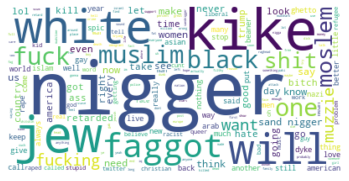

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in hate_speech)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

nigger 1702
kike 909
jew 776
white 587
will 569
user 517
number 514
faggot 457
muslim 359
fuck 358
one 352


In [ ]:
Counter(hate_speech['target'])

Counter({'African': 2202,
         'Arab': 403,
         'Asian': 143,
         'Caucasian': 85,
         'Christian': 8,
         'Disability': 7,
         'Economic': 1,
         'Heterosexual': 2,
         'Hindu': 2,
         'Hispanic': 194,
         'Homosexual': 505,
         'Indian': 8,
         'Islam': 973,
         'Jewish': 1079,
         'Men': 2,
         'None': 39,
         'Other': 84,
         'Refugee': 102,
         'Women': 96})

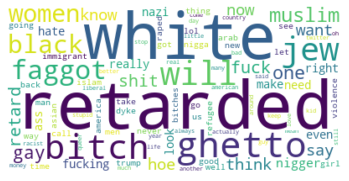

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in offensive)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

user 939
retarded 570
number 496
white 441
ghetto 439
bitch 405
jew 370
will 369
faggot 352
women 345
muslim 344


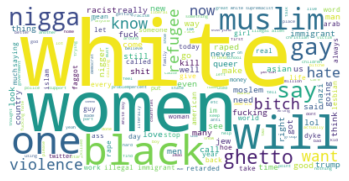

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in normal)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)


user user 1816
user 1021
white 830
number 821
women 581
will 581
people 550
one 449
muslim 439
black 435
nigga 394


**GAB Records**

In [ ]:
hate_gab = hate_speech.filter(lambda example: example['id'].endswith("gab"))
offensive_gab = offensive.filter(lambda example: example['id'].endswith("gab"))
normal_gab = normal.filter(lambda example: example['id'].endswith("gab"))

print("Hate Speech Records", len(hate_gab))
print("Offensive Records", len(offensive_gab))
print("Normal", len(normal_gab))

Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-0397cfda7be32f7b.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-02a43f13ab20b4a8.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-1410a14541349543.arrow


Hate Speech Records 5227
Offensive Records 3152
Normal 2044


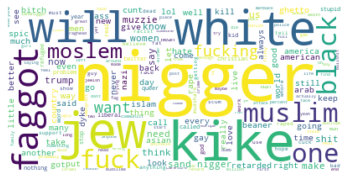

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in hate_gab)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

nigger 1520
kike 900
jew 748
white 583
will 528
number 475
faggot 361
user 342
muslim 334
black 329
one 324


In [ ]:
Counter(hate_gab['target'])

Counter({'African': 1928,
         'Arab': 373,
         'Asian': 100,
         'Caucasian': 39,
         'Christian': 7,
         'Heterosexual': 1,
         'Hindu': 1,
         'Hispanic': 194,
         'Homosexual': 388,
         'Indian': 8,
         'Islam': 904,
         'Jewish': 1046,
         'Men': 1,
         'None': 14,
         'Other': 55,
         'Refugee': 88,
         'Women': 80})

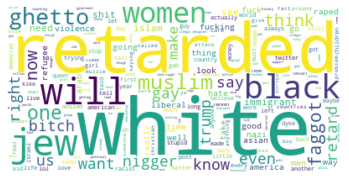

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in offensive_gab)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

white 397
number 380
retarded 353
jew 329
will 315
women 298
ghetto 290
black 290
muslim 278
people 242
user 241


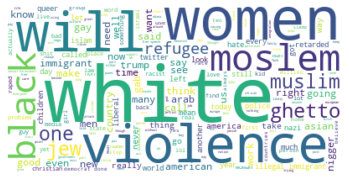

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in normal_gab)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

white 350
number 339
women 286
will 254
violence 229
people 213
user 199
moslem 172
black 161
ghetto 149
one 135


**Twitter Records**

In [ ]:
hate_twitter = hate_speech.filter(lambda example: example['id'].endswith("twitter"))
offensive_twitter = offensive.filter(lambda example: example['id'].endswith("twitter"))
normal_twitter = normal.filter(lambda example: example['id'].endswith("twitter"))

print("Hate Speech Records", len(hate_twitter))
print("Offensive Records", len(offensive_twitter))
print("Normal", len(normal_twitter))

Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-1a733564d4a1198a.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-519a138f04ee32d0.arrow
Loading cached processed dataset at /content/drive/MyDrive/Dissertation/hateexplain_ds_new/train/cache-1b68b42452faafde.arrow


Hate Speech Records 699
Offensive Records 2323
Normal 5756


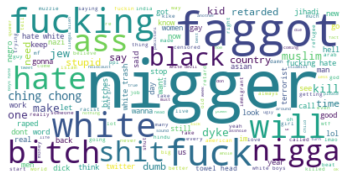

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in hate_twitter)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

nigger 234
user 188
user user 114
faggot 96
fuck 59
number 50
fucking 49
will 43
white 40
hate 40
ass 39


In [ ]:
Counter(hate_twitter['target'])

Counter({'African': 268,
         'Arab': 30,
         'Asian': 43,
         'Caucasian': 46,
         'Christian': 1,
         'Disability': 7,
         'Economic': 1,
         'Heterosexual': 1,
         'Hindu': 1,
         'Homosexual': 117,
         'Islam': 67,
         'Jewish': 32,
         'Men': 1,
         'None': 25,
         'Other': 29,
         'Refugee': 14,
         'Women': 16})

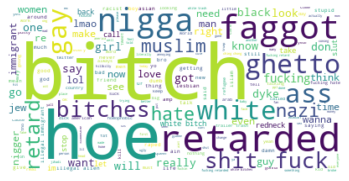

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in offensive_twitter)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

user 691
user user 301
bitch 282
hoe 218
faggot 175
retarded 164
number 147
ghetto 143
nigga 141
gay 136
bitches 132


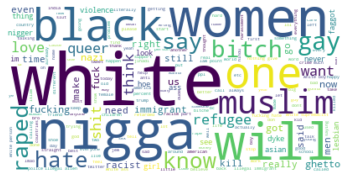

In [ ]:
# Generate a word cloud image
text = " ".join( record['sentence'] for record in normal_twitter)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
words = WordCloud().process_text(text)
vals = sort_by_value(words)

user user 1797
user 911
white 588
number 516
nigga 391
women 389
people 368
will 334
one 316
muslim 309
gay 300
